In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.feature_selection import chi2, f_classif

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: ylabel='Density'>

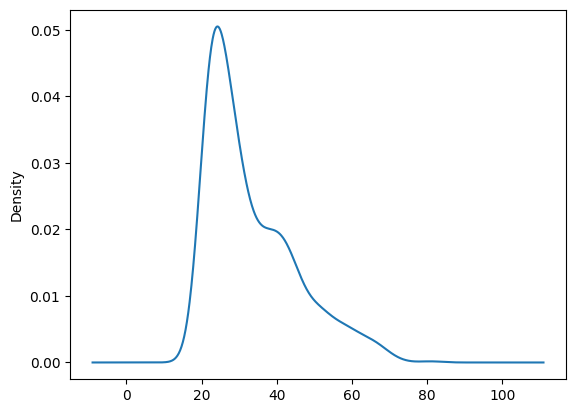

In [8]:
df.Age.plot.density()

<Axes: ylabel='Density'>

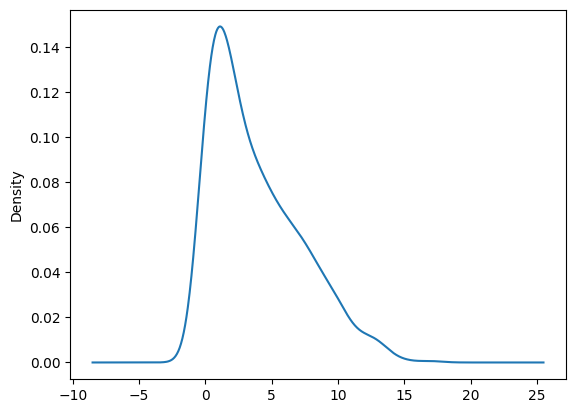

In [9]:
df.Pregnancies.plot.density()

<Axes: ylabel='Density'>

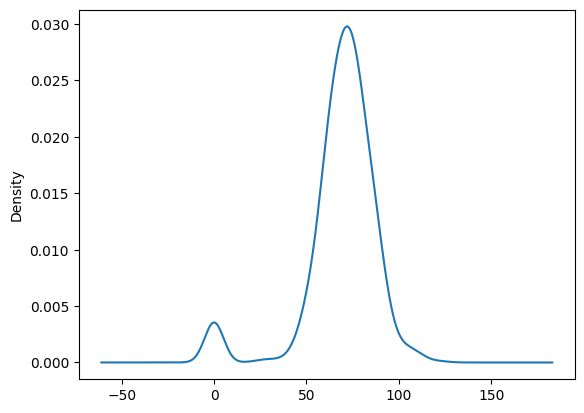

In [10]:
df.BloodPressure.plot.density()

In [11]:
X = df.iloc[:,0:len(df.columns)-1].values
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [12]:
Y = df.iloc[:,-1]
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [13]:
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX= scaler.fit_transform(X)
rescaledX

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [14]:
rescaledXdf = pd.DataFrame(rescaledX, columns= ['Pregnancies', 'Glucose', 'BloodPressure', 	'SkinThickness', 'Insulin',	'BMI', 'DiabetesPedigreeFunction', 'Age'])
rescaledXdf

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


In [15]:
rescaledXdf.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,0.204015
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,0.196004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,0.050000
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,0.133333
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
standardizer = StandardScaler().fit(rescaledX)
standardizedX = standardizer.transform(rescaledX)
standardizedX

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [17]:
standardizedXdf = pd.DataFrame(standardizedX, columns=['Pregnancies', 'Glucose', 'BloodPressure', 	'SkinThickness', 'Insulin',	'BMI', 'DiabetesPedigreeFunction', 'Age'] )
standardizedXdf

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [18]:
standardizedXdf.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-9.251859e-18,2.706169e-16,4.880355e-16,-1.688464e-16,1.243218e-16,-2.428613e-16,2.775558e-17,1.156482e-18
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00


In [19]:
normalizer = Normalizer().fit(standardizedX)
normalizedX = normalizer.transform(standardizedX)
normalizedX

array([[ 0.29364701,  0.38926293,  0.06866435, ...,  0.09361356,
         0.21497282,  0.65433406],
       [-0.45809296, -0.60910056, -0.0870472 , ..., -0.37109057,
        -0.19793435, -0.10338147],
       [ 0.40895107,  0.64421812, -0.08747937, ..., -0.36565747,
         0.20031842, -0.03499428],
       ...,
       [ 0.29761143,  0.00286423,  0.12984633, ..., -0.63793905,
        -0.59455625, -0.23928228],
       [-0.39110994,  0.07396761, -0.21790901, ..., -0.1111943 ,
        -0.17178822,  0.54194944],
       [-0.45728587, -0.4725132 ,  0.0250298 , ..., -0.10940027,
        -0.25643158, -0.47162272]])

In [20]:
normalizedXdf = pd.DataFrame(normalizedX, columns= ['Pregnancies', 'Glucose', 'BloodPressure', 	'SkinThickness', 'Insulin',	'BMI', 'DiabetesPedigreeFunction', 'Age'])
normalizedXdf

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.293647,0.389263,0.068664,0.416311,-0.317941,0.093614,0.214973,0.654334
1,-0.458093,-0.609101,-0.087047,0.287852,-0.375682,-0.371091,-0.197934,-0.103381
2,0.408951,0.644218,-0.087479,-0.426959,-0.229648,-0.365657,0.200318,-0.034994
3,-0.425010,-0.502137,-0.080761,0.077736,0.062026,-0.248523,-0.463179,-0.523940
4,-0.186954,0.082528,-0.246360,0.148546,0.125389,0.230816,0.898036,-0.003356
...,...,...,...,...,...,...,...,...
763,0.474619,-0.161678,0.092553,0.447334,0.225917,0.029905,-0.235953,0.657508
764,-0.412899,0.026072,0.034849,0.305535,-0.522147,0.459799,-0.300137,-0.400167
765,0.297611,0.002864,0.129846,0.134092,0.242609,-0.637939,-0.594556,-0.239282
766,-0.391110,0.073968,-0.217909,-0.596333,-0.320749,-0.111194,-0.171788,0.541949


In [21]:
normalizedXdf.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,-0.029202,-0.035199,0.015273,0.008376,-0.020091,-0.013928,-0.033374,-0.049970
std,0.372804,0.370004,0.304359,0.386974,0.328127,0.338886,0.342877,0.369252
min,-0.778874,-0.917873,-0.891431,-0.829106,-0.644321,-0.909906,-0.773632,-0.732146
25%,-0.329314,-0.302614,-0.137178,-0.324046,-0.272916,-0.270521,-0.290049,-0.355483
50%,-0.116355,-0.051836,0.049074,0.057186,-0.147720,0.000576,-0.123026,-0.140985
75%,0.266900,0.226748,0.215058,0.327209,0.187654,0.222935,0.186248,0.227950
max,0.891015,0.936682,0.772424,0.818977,0.899737,0.851350,0.913122,0.909759


<Axes: ylabel='Density'>

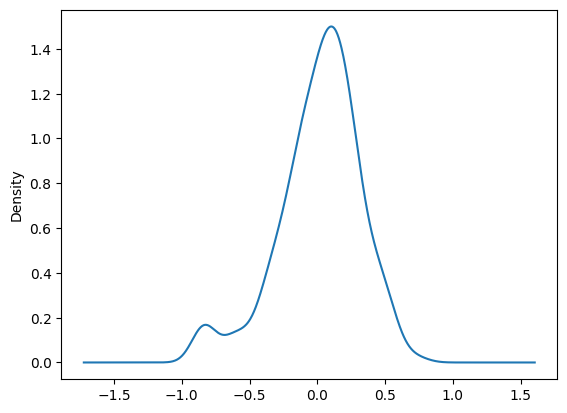

In [22]:
normalizedXdf.BloodPressure.plot.density()

<Axes: ylabel='Density'>

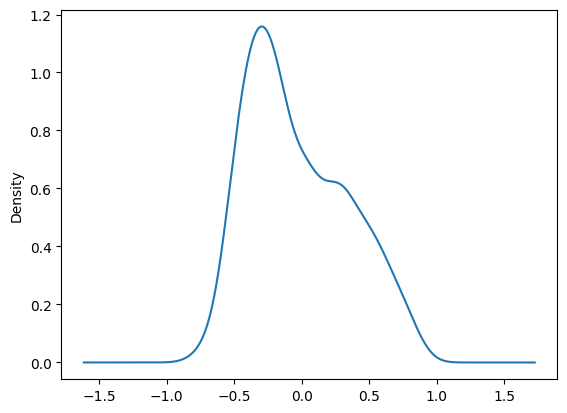

In [23]:
normalizedXdf.Pregnancies.plot.density()

<Axes: ylabel='Density'>

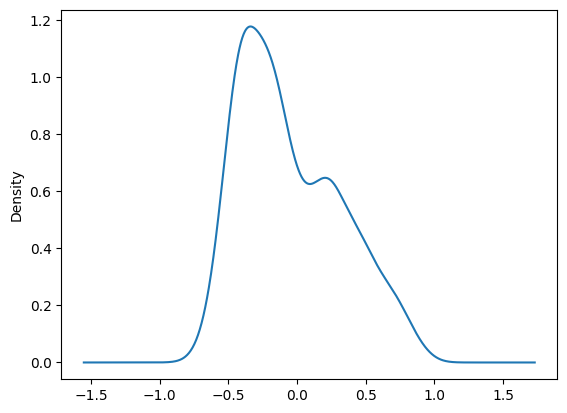

In [24]:
normalizedXdf.Age.plot.density()